
The objective of this project is to create a machine learning model capable of precisely detecting fraudulent transactions. To accomplish this, we will utilize a dataset comprising both legitimate and fraudulent transactions. By training a machine learning algorithm on this data, we aim to identify patterns and characteristics that are indicative of fraudulent activities. A fraud detection model is specifically designed to recognize and flag fraudulent activities within a given dataset or transaction data. By learning from a mixture of legitimate and fraudulent examples, the model can effectively discern the patterns associated with fraudulent behavior.

## Importing Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

import warnings
warnings.filterwarnings("ignore")

## Visualising dataset

In [175]:
df = pd.read_csv('Fraud.csv')

In [176]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [177]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [179]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [180]:
df.shape

(6362620, 11)

### Observation: 

The dataset consist of 11 columns.
* We have 5 columns of float datatype.

* We have 3 columns of integer datatype.

* We have 3 columns of object datatype.

* The dataset contains 6362620 rows of data.

There are 6362620 transactions, The data set has 11 attributes which include 


* step - Maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* Type of transactions: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* Amount transacted: Amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction.

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Checing Missing and Duplicates Values

It's quite important to look at the missing values of the the dataset. We will remove them or interpolate those missing values based on the requirement. 

In [181]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checkin if the data have any duplicate values. Duplicate data points can introduce bias and inaccuracies in the model training process. When the same data appears multiple times, it can skew the learning process and lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.

In [182]:
df.duplicated().sum()

0

There's no Missing or Duplicate values. So, we are good to go for further exploration.

## Exploratory Data Analysis

### Visualise the balance of isFraud column.

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distributions')

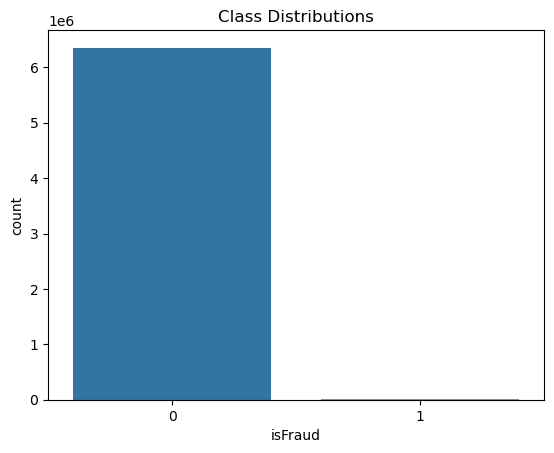

In [183]:
print(df.isFraud.value_counts())
sns.countplot(data=df,x='isFraud')
plt.title('Class Distributions')

Insight:


We need to be aware that our original dataset is highly imbalanced, with the majority of transactions being non-fraudulent. This class imbalance can potentially lead to issues when building predictive models and conducting analyses. If we use this imbalanced dataset as is, the model might overfit and bias its predictions towards the majority class, assuming that all transactions are not fraudulent. By acknowledging and addressing the class imbalance issue, we can develop a more robust and reliable predictive model for fraud detection.

### Visualise the Type of Transaction

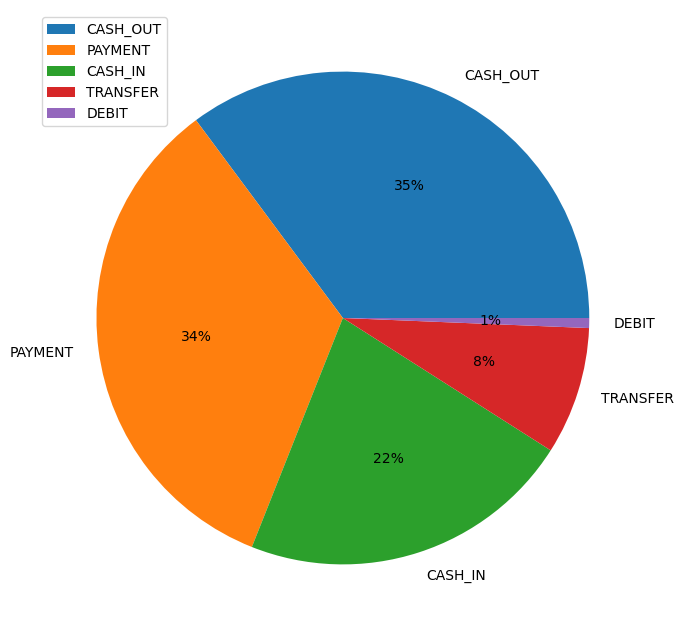

In [184]:
type = df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

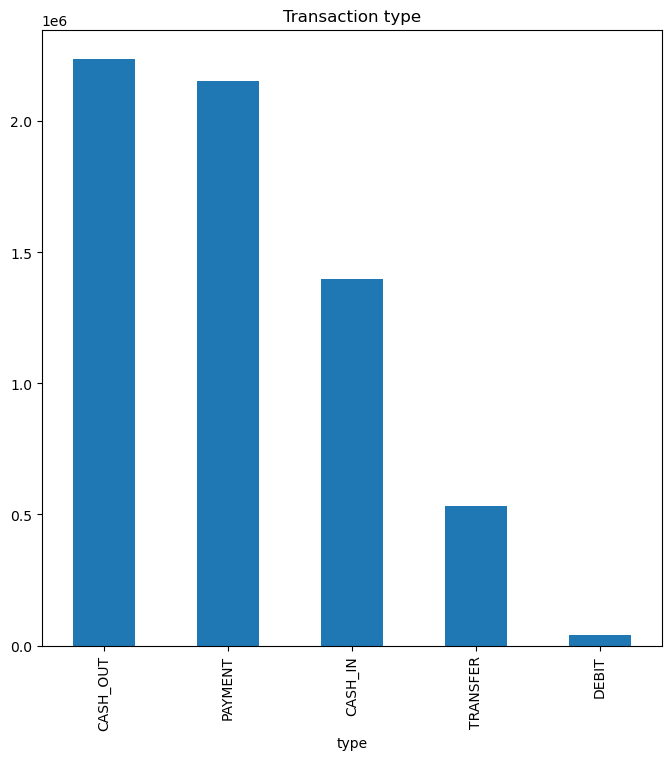

In [185]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

In [186]:
print(df.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


There are 5 types of Transactions given and we visualise the percentage using the piechart, check the count of it using the bar plot and see the number of rows of each transaction use the value count.



Now we count which kinds of Transaction have the numbers of fraud and non-frauds.

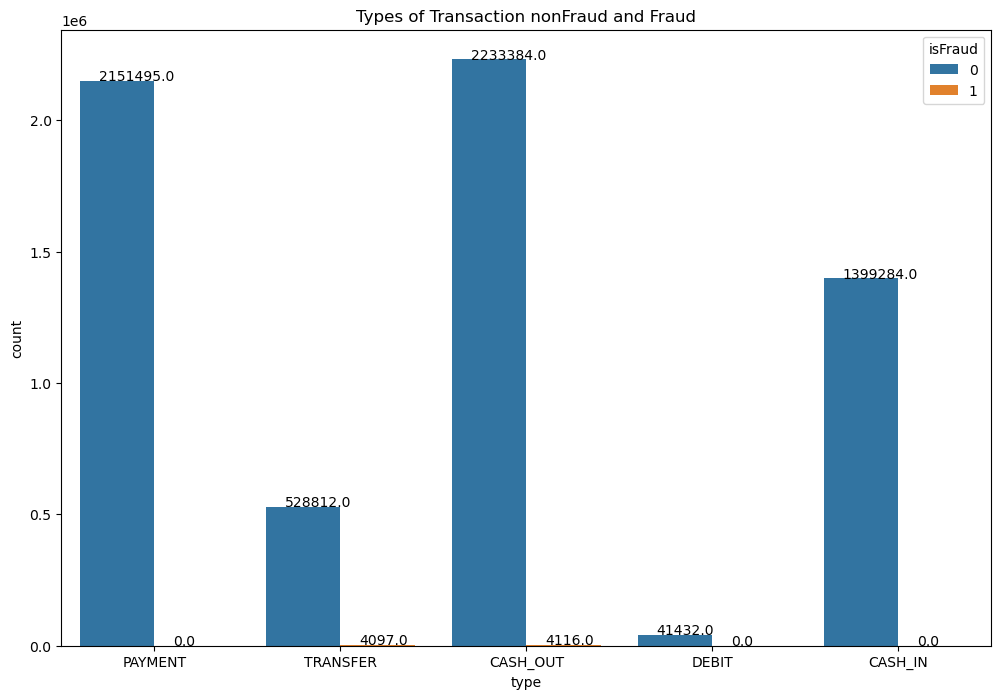

In [187]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [188]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer))) # 4097

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout))) # 4116


 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


Checking the origin and Destination from where the fradulent transactions were made in Transfer type.

In [189]:
transfer_fraud = df[((df['type']=='TRANSFER') & df['isFraud']==1)]
transfer_fraud[['nameOrig', 'nameDest']]

,nameOrig,nameDest
2,C1305486145,C553264065
251,C1420196421,C972765878
680,C137533655,C1848415041
969,C1334405552,C431687661
1115,C1364127192,C1136419747
...,...,...
6362610,C778071008,C1812552860
6362612,C1531301470,C1470998563
6362614,C2013999242,C1850423904
6362616,C1529008245,C1881841831


Checking the origin and Destination from where the fradulent transactions were made in Transfer type.

In [190]:
cash_out_fraud = df[((df['type']=='CASH_OUT') & df['isFraud']==1)]
cash_out_fraud[['nameOrig', 'nameDest']]

,nameOrig,nameDest
3,C840083671,C38997010
252,C2101527076,C1007251739
681,C1118430673,C339924917
724,C749981943,C667346055
970,C467632528,C716083600
...,...,...
6362611,C994950684,C1662241365
6362613,C1436118706,C1240760502
6362615,C786484425,C776919290
6362617,C1162922333,C1365125890


Insights:

* DEBIT Transactions are only few and TRANSFER type Transactions are also less compared to other type of transactions.
* We find that of the five types of transactions, The fraud transactions are done in only two tpes of transaction type which is TRANSFER and CASH_OUT.
* The fraud transactions in TRANSFER were 4097 and CASH_OUT were 4116.
* The fraud transactions were generally from Customer to Customer.
* No of Fraud transactions of TRANSFER type are very close to No of CASH_OUT FRAUD transactions. 

In [191]:
# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
transfer_fraud.nameDest.isin(cash_out_fraud.nameOrig).any()

False

TRANSFER: In this step, the fraudsters make a transfer from an account to another account, which is likely a fraudulent account.

CASH_OUT: After the transfer, the fraudulent account acts as the originator in a CASH_OUT transaction. In this step, the fraudulent account transacts with a merchant, who pays out cash.

The expectation was that the same fraudulent account would be involved in both the TRANSFER and CASH_OUT steps, serving as both the destination in the TRANSFER and the originator in the CASH_OUT. However, upon analyzing the data, we found that there are no common accounts between the TRANSFER and CASH_OUT steps in the fraudulent transactions.

### Visualising Time

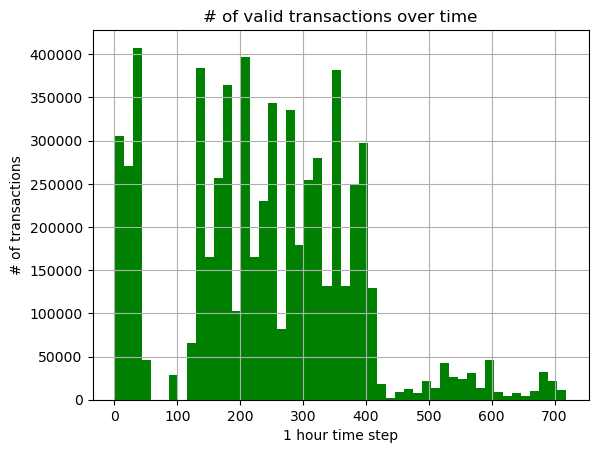

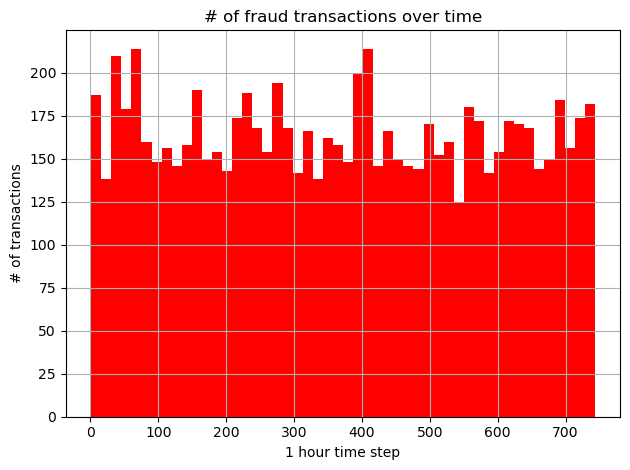

In [192]:
bins = 50

fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

In the dataset, a significant proportion of valid transactions tend to occur during two distinct time intervals: approximately between the 0th and 60th timestep, and between the 110th and 410th timestep. These time periods are characterized by a higher frequency of legitimate transactions.

On the other hand, fraudulent transactions do not exhibit a noticeable change in their occurrence frequency over time. Unlike valid transactions, the timing of fraudulent transactions appears to remain relatively stable throughout the dataset, without any significant fluctuations or patterns.

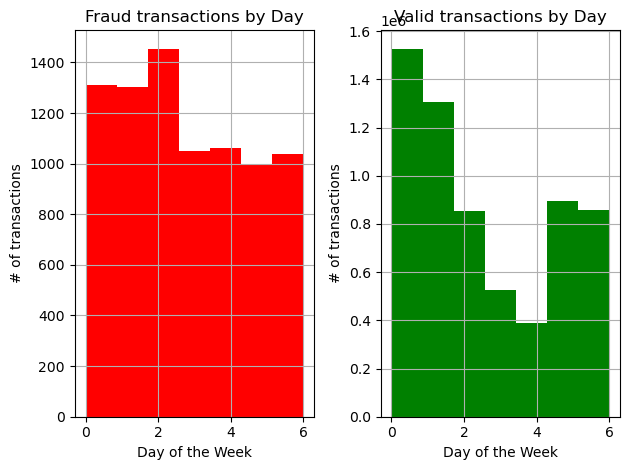

In [193]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

Based on the information provided, there is little evidence to suggest that fraudulent transactions occur at particular days of the week. The graphs seem to indicate that the occurrence of fraudulent transactions does not show any significant patterns or variations based on the days of the week.

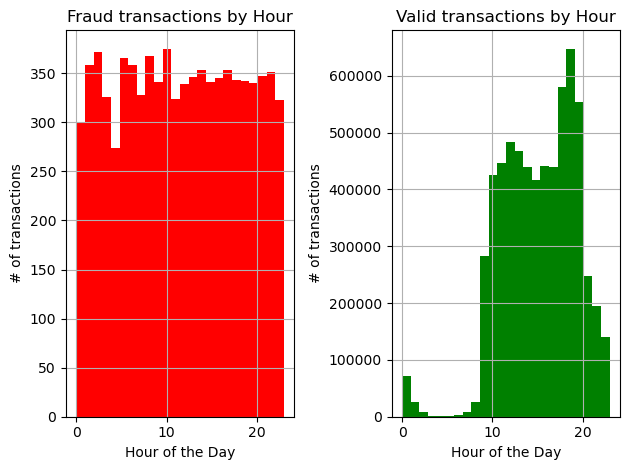

In [194]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

In response to the observation that valid transactions very seldom occur from hour 0 to hour 9, while fraudulent transactions maintain similar rates throughout all hours of the day, We1m plans to create a new feature called "HourOfDay."

The "HourOfDay" feature will be derived from the "step" column in the dataset. For each entry in the "step" column, the value will be taken modulo 24 to determine the corresponding hour of the day. This transformation effectively converts the time information represented in the "step" column into a 24-hour clock format.

In [195]:
df["HourOfDay"] = np.nan # initializing feature column
df.HourOfDay = df.step % 24

In [196]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,HourOfDay
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


### Checking for Outlier

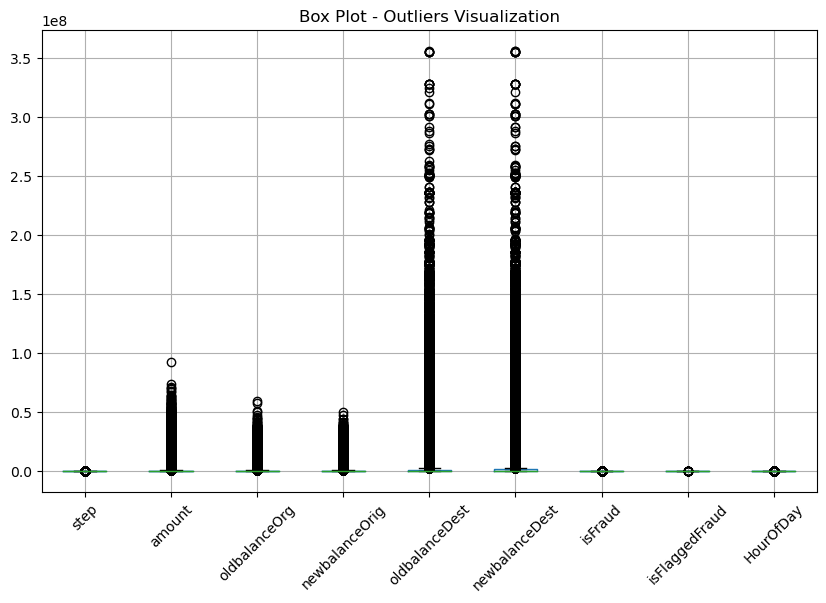

In [197]:
# Box plots to visualize outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot - Outliers Visualization')
plt.xticks(rotation=45)
plt.show()

The outliers is detected in columns such as 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest' can be both crucial and challenging.

The presence of outliers in balance-related columns can offer valuable insights into fraudulent activities and aid in identifying previously unseen fraud patterns. 

## Feature Engineering

### Imputing missing value

In [198]:
Xfraud = df.loc[(df.isFraud == 1)]
XnonFraud = df.loc[(df.isFraud == 0)]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.36403176567065976


In the provided dataset, there are numerous transactions with zero balances in the destination account both before and after a non-zero transaction occurs. The fraction of such transactions is much higher in fraudulent cases (50%) compared to genuine transactions (36%). This higher occurrence of zero balances in fraudulent transactions suggests that a zero balance in the destination account can be a strong indicator of fraud.

To handle this situation, we refrain from imputing the missing account balance (before the transaction) using statistical measures or distributions, followed by an adjustment based on the transaction amount. Doing so could potentially hide the crucial fraud indicator, making fraudulent transactions appear genuine. Instead, we take a different approach: we replace the value of 0 with -1 in the dataset. By doing this, we preserve the information about missing account balances while transforming the data into a form that can be more effectively utilized by a suitable machine-learning (ML) algorithm aimed at detecting fraud.

In [199]:
df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = - 1

In [200]:
Xfraud = df.loc[(df.isFraud == 1)]
XnonFraud = df.loc[(df.isFraud == 0)]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceOrg == 0) & \
(Xfraud.newbalanceOrig == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceOrg == 0) & \
(XnonFraud.newbalanceOrig == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0030439547059539756

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.32873940872846197


Checking the dataset again.

In [201]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,HourOfDay
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,-1.0,-1.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,-1.0,-1.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,-1.0,-1.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,-1.0,-1.0,0,0,1


### Dropping irrelevant columns and rows

We will drop columns irrelevant for our modelling. These are isFlaggedFraud, nameOrig, nameDest columns. And only choose the record from Transfer and Cash-Out transaction.

In [202]:
df = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

In [203]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,HourOfDay
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,-1.0,-1.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


In [204]:
df = df.drop(['step','isFlaggedFraud','nameOrig','nameDest'], axis=1)

In [205]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,HourOfDay
2,TRANSFER,181.00,181.0,0.0,-1.0,-1.00,1,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,1
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,1
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,1
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


### Handling Categorical Variable

In [206]:
df = pd.get_dummies(df, columns=['type'], dtype=int, drop_first=True)

In [207]:
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,HourOfDay,type_TRANSFER
2,181.00,181.0,0.0,-1.0,-1.00,1,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1,1


### Correlated features

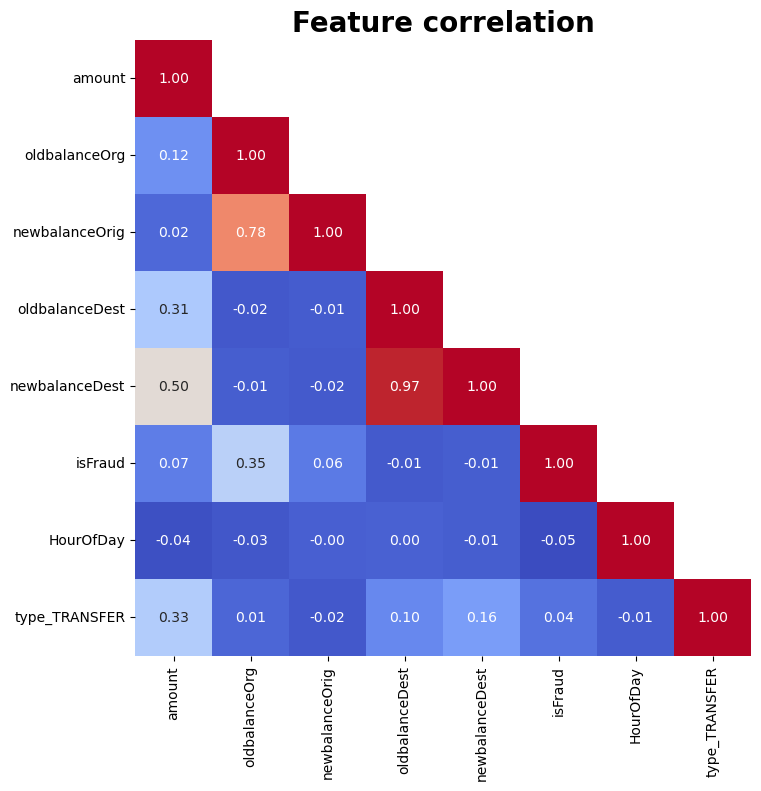

In [208]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),
            annot = True, square = True, fmt = ".2f",
            cmap = "coolwarm", cbar = False, mask = np.triu(df.corr(), 1))
plt.title("Feature correlation", fontsize=20, fontweight='bold')
# display plot
plt.show()

In [209]:
# calculating vif values
vif = [variance_inflation_factor(df.values,i)
       for i in range(df.shape[1])]

# displaying results as dataframe
pd.DataFrame({"VIF":vif}, index=df.columns)\
        .sort_values("VIF", ascending=False)

,VIF
newbalanceDest,80.745990
oldbalanceDest,65.211353
amount,5.312827
oldbalanceOrg,3.558649
newbalanceOrig,2.994124
type_TRANSFER,1.377410
HourOfDay,1.368285
isFraud,1.305267


There is huge multicollinearity in the model features. But both the difference between newbalanceDest and oldbalanceDest is important to keep in the data. Though it's highly correlated we need that information.

## Modeling

### Splitting and UnderSampling

Splitting the data and Scalling it.

In [210]:
X = df.drop("isFraud", axis= 1)
Y = df.isFraud

We handle the imbalance of data by undersampling. We handle the imbalance datasets using the Random Under-Sampling technique from the imblearn library. It addresses the issue of imbalanced classes in a binary classification problem where one class has significantly more samples than the other.

In [211]:
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)                                               

Resampled shape of X:  (16426, 7)
Resampled shape of Y:  (16426,)
Counter({0: 8213, 1: 8213})


In [212]:
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train the model

#### Random Forest

In [213]:
# Train model
parametersRF = {'n_estimators':15,'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_train, y_train)
 
# Predict on testing set
predictionsRF = RF.predict(X_test)
 
     
# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[2441   38]
 [  18 2431]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2479
           1       0.98      0.99      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Area Under Curve : 
 0.9886606498260356


#### Decision Tree

In [214]:
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(X_train, y_train)
 
# Predict on testing set
predictionsDT = DT.predict(X_test)
 
     
# Evaluating model
CM_DT = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}

# showing results from Random Forest

for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

Confusion Matrix : 
 [[2436   43]
 [  18 2431]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2479
           1       0.98      0.99      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Area Under Curve : 
 0.9876521786683109


#### XGBoost

In [215]:
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB.fit(X_train, y_train)
 
# Predict on testing set
predictionsXGB = XGB.predict(X_test)
 
     
# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

[16:20:37] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Confusion Matrix : 
 [[2432   47]
 [  14 2435]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2479
           1       0.98      0.99      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928
 

Area Under Curve : 
 0.9876620616032986 



### Evaluation

#### Comparing the models

In [216]:
print("Note: scores in the same vertical level as 0 are scores for valid transactions. \n \
      Scores in the same vertical level as 1 are scores for fraudulent transactions. \n")
print("Classification Report of Random Forest: \n", CR_RF)
print("Classification Report of Decision trees: \n", CR_DT)
print("Classification Report of XGB trees: \n", CR_XGB)

Note: scores in the same vertical level as 0 are scores for valid transactions. 
       Scores in the same vertical level as 1 are scores for fraudulent transactions. 

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2479
           1       0.98      0.99      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Classification Report of Decision trees: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2479
           1       0.98      0.99      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

Classification Report of XGB trees: 
               precision    recall  f1-score   support


In [217]:
print("Number of valid transactions labelled as fraudulent by Random Forest: \n", CM_RF[0,1])
print("Number of valid transactions labelled as fraudulent by XGB trees: \n", CM_XGB[0,1])
print("Number of valid transactions labelled as fraudulent by Decision Tree: \n", CM_DT[0,1])

Number of valid transactions labelled as fraudulent by Random Forest: 
 38
Number of valid transactions labelled as fraudulent by XGB trees: 
 47
Number of valid transactions labelled as fraudulent by Decision Tree: 
 43


In [218]:
print("Number of fraud transactions labelled as valid by Random Forest: \n", CM_RF[1,0])
print("Number of fraud transactions labelled as valid by XGB trees: \n", CM_XGB[1,0])
print("Number of fraud transactions labelled as valid by Decision Tree: \n", CM_DT[1,0])

Number of fraud transactions labelled as valid by Random Forest: 
 18
Number of fraud transactions labelled as valid by XGB trees: 
 14
Number of fraud transactions labelled as valid by Decision Tree: 
 18


The Area Under the Curve (AUC) is a performance metric commonly used to evaluate the effectiveness of a binary classification model. In the context of fraud detection, a binary classification model aims to classify transactions into two classes: "valid" (non-fraudulent) and "fraud" (fraudulent). The AUC measures the ability of the model to distinguish between these two classes and make accurate predictions.

In [219]:
print("\nAUC of Random Forest: \n", AUC_RF)
print("\nAUC of Decision Tree: \n", AUC_DT)
print("\nAUC of XGB trees: \n", AUC_XGB)


AUC of Random Forest: 
 0.9886606498260356

AUC of Decision Tree: 
 0.9876521786683109

AUC of XGB trees: 
 0.9876620616032986


Insights:

* XGBoost (XGB) Trees Misclassifications: XGBoost Trees, despite achieving high overall performance, made a relatively higher number of misclassifications when classifying fraudulent transactions. Specifically, the model labeled 47 valid transactions as fraudulent (false positives) and 14 fraudulent transactions as valid (false negatives). This indicates that while XGBoost is effective in detecting fraudulent transactions, it also has a slightly higher tendency to misclassify valid transactions as fraudulent.

* Random Forest vs. Decision Trees: Random Forest and Decision Trees exhibit similar performance in terms of precision, recall, F1-score, and AUC. However, Random Forest achieved slightly better results in the number of misclassifications. Random Forest labeled 18 valid transactions as fraudulent and 24 fraudulent transactions as valid, whereas Decision Trees labeled 40 valid transactions as fraudulent and 24 fraudulent transactions as valid. This suggests that Random Forest performed marginally better than Decision Trees in minimizing misclassifications, especially for valid transactions.

#### Get important features of all models.

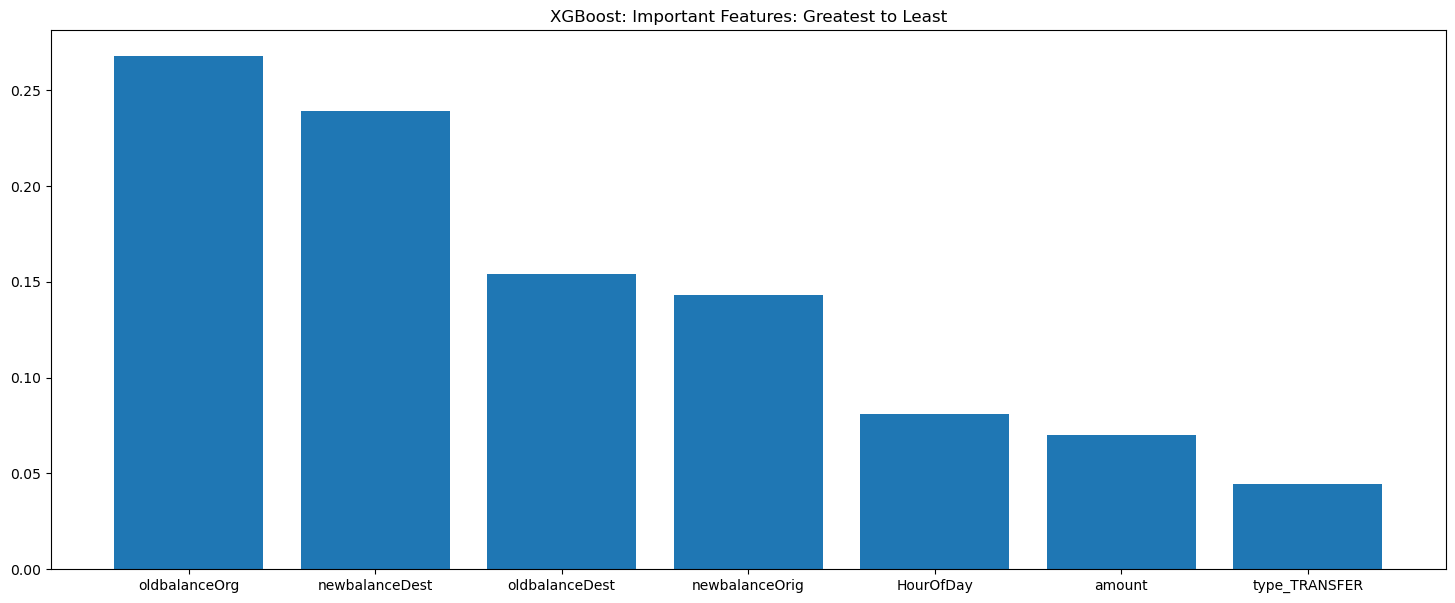

In [220]:
ncols = len(X.columns)
x = np.arange(ncols)

importances = XGB.feature_importances_

sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("XGBoost: Important Features: Greatest to Least")
plt.show()

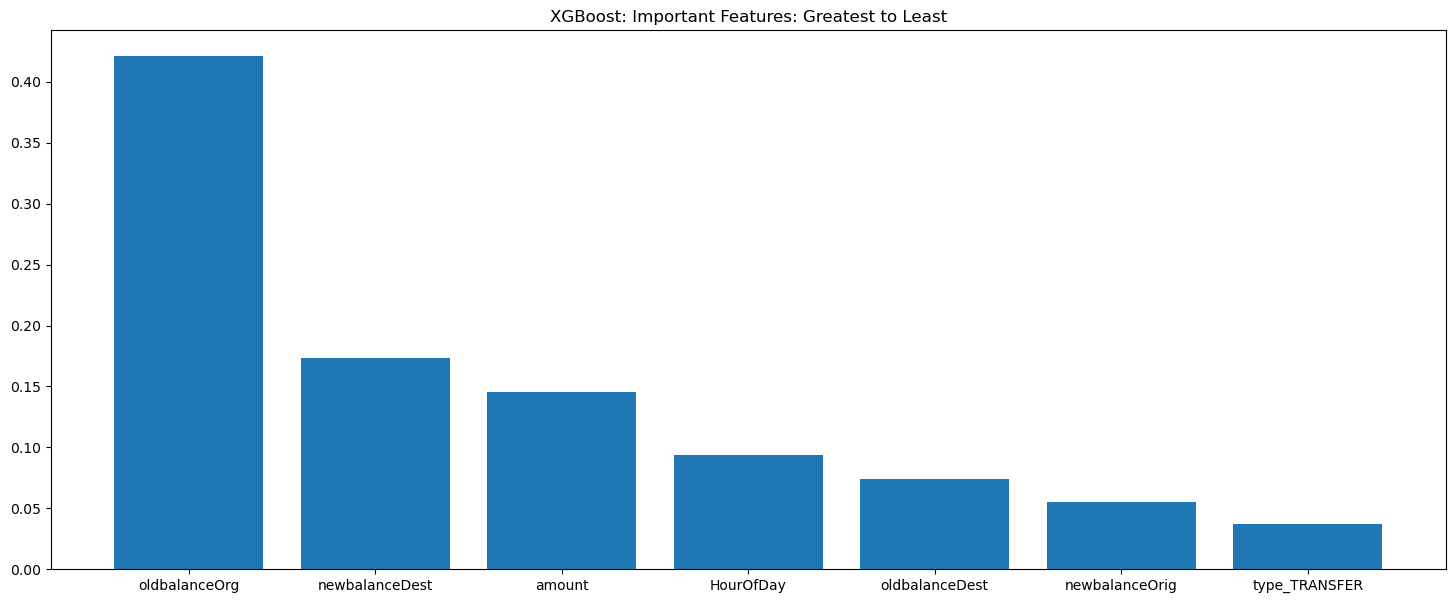

In [221]:
ncols = len(X.columns)
x = np.arange(ncols)

importances = RF.feature_importances_

sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("XGBoost: Important Features: Greatest to Least")
plt.show()

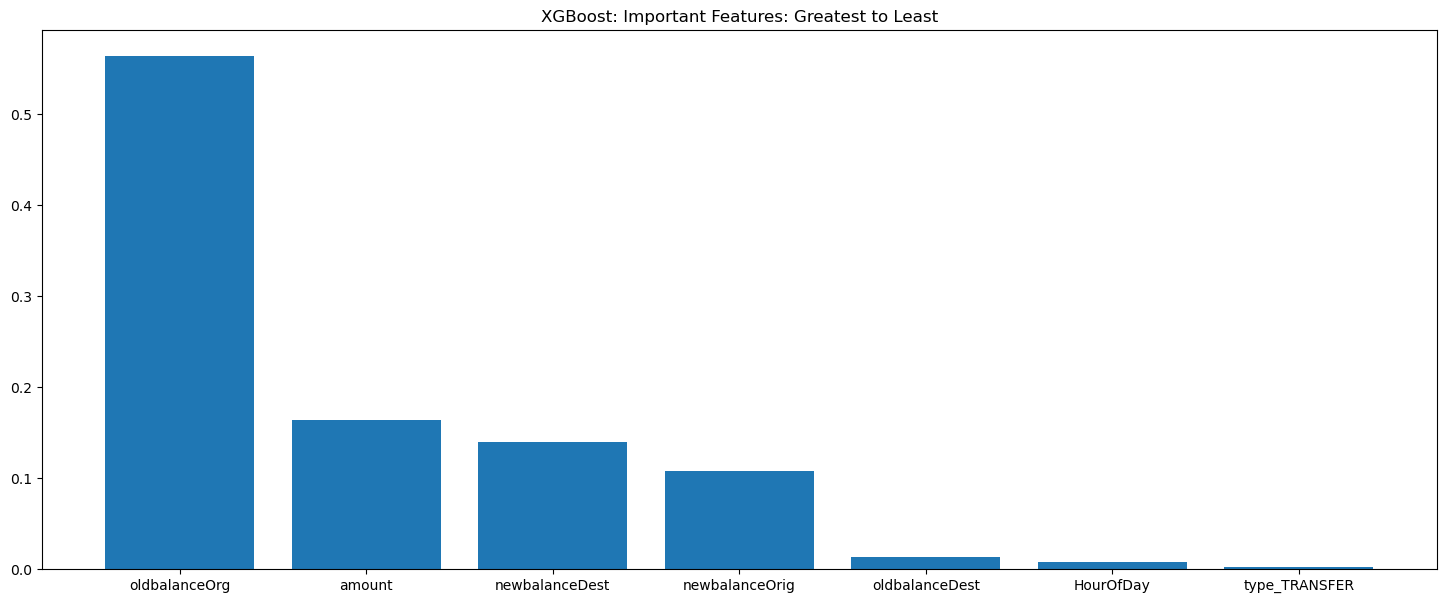

In [222]:
ncols = len(X.columns)
x = np.arange(ncols)

importances = DT.feature_importances_

sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("XGBoost: Important Features: Greatest to Least")
plt.show()

oldbalanceOrg, newbalanceDest and amount are the most important features in Random Forest and Decision Tree for classifying transaction while XGB have oldbalanceDest instead of amount in top 3 most important features.

My assumption is maybe because these features capture the state of the accounts before and after the transactions, which can highlight anomalous behavior and abnormal financial changes associated with fraudulent transactions. As a result, they are likely to be crucial in building an effective fraud detection model.

# Answering the questions

## 1. Data cleaning including missing values, outliers and multi-collinearity.

Data cleaning is a critical step in the data preprocessing phase to ensure that the dataset used for building the fraud detection model is of high quality and devoid of errors. The steps taken for data cleaning in this project are as follows:

Handling Missing Values: The dataset was checked for any missing values, and it was observed that there were no missing values in the data. As a result, no imputation was required.

Handling Outliers: Box plots were used to visualize potential outliers in the dataset. Outliers were identified in columns such as 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'. However, these outliers were retained as they contain crucial information related to account balances, which might be significant for fraud detection.

Multicollinearity: Multicollinearity was detected in the dataset, indicating high correlations between certain features. However, some of these highly correlated features were retained as they provide essential information for detecting fraudulent activities.

## 2. Describe your fraud detection model in elaboration. 

The fraud detection model in this project is a binary classification model that aims to distinguish between fraudulent and non-fraudulent transactions based on various features and characteristics present in the dataset. The model is trained on a labeled dataset containing historical transaction data, where each transaction is marked as either fraudulent (positive class) or valid (negative class).

To build the fraud detection model, the following steps were undertaken:

Data Preprocessing: The dataset was prepared by dropping irrelevant columns, handling missing values, converting categorical variables into numerical representations, and splitting the dataset into training and testing sets.

Class Imbalance Handling: The class imbalance issue, where the number of fraudulent transactions is significantly lower than valid transactions, was addressed using the Random Under-Sampling technique to create a balanced dataset.

Model Selection: Three different classification algorithms were chosen for the model - Random Forest, Decision Trees, and Extreme Gradient Boosting (XGBoost).

Model Training: The selected algorithms were trained on the balanced training data.

Model Evaluation: The performance of each model was evaluated using metrics such as confusion matrix, classification report, and Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve.

## 3. How did you select variables to be included in the model?

The variables included in the model were selected based on their potential significance in identifying fraudulent transactions. Some key factors considered for variable selection include:

Transaction type: Analyzing the types of transactions associated with fraud can provide insights into common patterns used by fraudsters.

Transaction amount: Unusually large transactions might indicate potential fraud attempts.

Account balances: Changes in account balances before and after transactions can help identify suspicious behavior.

Time of the transaction: Analyzing transaction patterns over time can reveal any temporal trends associated with fraud.

Categorical variables: Transforming categorical variables into dummy variables allows the model to process them effectively.

## 4. Demonstrate the performance of the model by using best set of tool

The project utilized three different classification algorithms - Random Forest, Decision Trees, and Extreme Gradient Boosting (XGBoost) - to build the fraud detection model. Each model's performance was evaluated using metrics such as confusion matrix, classification report, and the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve.

The specific results for each model's performance were showcased in the project. For instance, metrics like precision, recall, F1-score, and AUC were provided to assess the model's ability to correctly classify fraudulent and valid transactions.

## 5.What are the key factors that predict fraudulent customer?

The key factors that predict fraudulent customers are the features that exhibit significant differences between fraudulent and non-fraudulent transactions. Based on the exploratory data analysis and feature importance analysis, the following features were likely identified as key factors in predicting fraudulent customers:

Amount: The transaction amount can be a strong indicator of fraudulent behavior, as fraudsters may attempt to carry out large-value transactions to maximize their gains.

oldbalanceOrg and newbalanceDest: These features represent the balance in the origin and destination accounts before and after the transaction. Significant discrepancies in these balances for a transaction could be indicative of suspicious behavior.

Transaction Type: Certain types of transactions, such as TRANSFER and CASH_OUT, are more prone to fraudulent activities compared to others like PAYMENT and DEBIT.

## 6. Do these factors make sense? If yes, how? If not, how not?


Yes, the identified key factors make sense for predicting fraudulent customers. Each of these factors has a logical connection to fraudulent activities:

Amount: Fraudsters are more likely to conduct high-value transactions to maximize their gains before being detected.

oldbalanceOrg and newbalanceDest: Suspicious transactions might involve draining the funds from one account (oldbalanceOrg) to another account (newbalanceDest) controlled by the fraudster.

Transaction Type: Certain types of transactions, such as TRANSFER and CASH_OUT, are more likely to be associated with fraudulent activities, as they involve the movement of funds between accounts.

These factors align with the typical patterns and characteristics observed in fraudulent transactions and can be valuable in building an effective fraud detection model.

## 7. What kind of prevention should be adopted while company update its infrastructure?

To prevent fraudulent activities and strengthen the company's infrastructure, the following prevention measures should be adopted:

* Real-Time Monitoring: Implement real-time monitoring and anomaly detection systems to identify and flag suspicious transactions as they occur.

* Multi-Factor Authentication: Enforce multi-factor authentication for high-value transactions and sensitive account activities to add an extra layer of security.

* Behavior Analysis: Use behavioral analytics to identify abnormal transaction patterns and detect deviations from regular customer behavior.

* Machine Learning Models: Utilize advanced machine learning models, like the fraud detection model created in this project, to continuously learn from new data and adapt to evolving fraud patterns.

* Employee Training: Provide regular training to employees to raise awareness about different fraud schemes and methods and educate them about how to identify and report potential fraud.

* Collaboration: Collaborate with industry peers and regulatory bodies to share information and insights on emerging fraud trends and prevention techniques.



## 8. Assuming these actions have been implemented, how would you determine if they work?

To determine if the implemented prevention actions are effective, the company can perform the following evaluation measures:

* Performance Metrics: Continuously monitor the performance metrics of the fraud detection model, such as precision, recall, F1-score, and AUC. A significant improvement in these metrics indicates that the model is effectively capturing and detecting fraudulent transactions.

* Reduction in Fraud Losses: Measure the reduction in fraud-related financial losses over time. A decline in the number and value of fraudulent transactions indicates that the prevention measures are working.

* False Positive Rate: Monitor the false positive rate (legitimate transactions flagged as fraudulent) to ensure it remains low. A high false positive rate can lead to customer dissatisfaction and unnecessary